In [1]:
#SQL insert
#Postgresqlへのコネクション
import psycopg2 as ps
import configparser
import pandas as pd

config_ini = configparser.ConfigParser()
config_ini.read('../../public/psql_local_pass.ini', encoding='utf-8')

host = config_ini["DEFAULT"]["host"]
port = config_ini["DEFAULT"]["port"]
dbname = config_ini["DEFAULT"]["dbname"]
user = config_ini["DEFAULT"]["user"]
password = config_ini["DEFAULT"]["password"]

con = ps.connect("host="+host+" port="+port+" dbname="+dbname+" user="+user+" password="+password)
con.set_client_encoding('utf-8')

stock_list = pd.read_csv("../../stock/stocklist.csv")

In [2]:
#データ取得
data = pd.read_sql_query(sql="select * from stock_detail",con = con)

In [3]:
data = data[data["current_price"] != 0.0]

In [4]:
for idx, row in data[data["current_price"] == 0.0].iterrows():
    data.at[idx, 'current_price']  = data.at[idx, 'sellside_price']
#対象日付のデータのみ取得する
data["stock_code"] = data["stock_code"].astype(int)

In [5]:
#銘柄コードで平均を算出する
result_ave = data.groupby("stock_code",as_index=True).mean()
result_ave = pd.merge(result_ave,stock_list,left_on="stock_code",right_on="銘柄コード",how="left")

In [6]:
result_ave

,id,current_price,open_price,yesterday_price,high_price,volume,low_price,trading_volume,over,under,sellside_price,buyside_price,sellside_atm,buyside_atm,銘柄コード,銘柄名,市場名,業種分類,単元株数,日経225採用銘柄
0,3931.0,2686.0,2655.0,2630.0,2686.0,18900.0,2627.0,50303.0,19200.0,19000.0,2686.0,2678.0,-7400.0,34900.0,1301,(株)極洋,東証1部,水産・農林業,100,NaN
1,3932.0,446.0,461.0,462.0,461.0,4827700.0,434.0,2148127.0,511800.0,604200.0,446.0,444.0,-573300.0,3934900.0,1332,日本水産(株),東証1部,水産・農林業,100,1.0
2,3933.0,2171.0,2248.0,2305.0,2250.0,567100.0,2156.0,1238754.0,89100.0,65400.0,2174.0,2170.0,-24000.0,44600.0,1333,マルハニチロ(株),東証1部,水産・農林業,100,1.0
3,3934.0,899.0,871.0,884.0,901.0,1900.0,871.0,1696.0,11100.0,300.0,901.0,877.0,-54700.0,77200.0,1352,(株)ホウスイ,東証1部,卸売業,100,NaN
4,3936.0,3735.0,3630.0,3640.0,3735.0,214100.0,3630.0,787120.0,65700.0,47400.0,3735.0,3720.0,-424000.0,446000.0,1377,(株)サカタのタネ,東証1部,水産・農林業,100,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727,5851.0,1709.5,1708.5,1711.0,1714.0,650.0,1700.5,1108.5,6500.0,1950.0,1709.5,1695.5,-50550.0,44700.0,9993,(株)ヤマザワ,東証1部,小売業,100,NaN
3728,5852.0,2217.5,2202.5,2201.0,2224.0,4550.0,2192.0,10042.0,13750.0,17050.0,2219.5,2212.0,-23700.0,27100.0,9994,(株)やまや,東証1部,小売業,100,NaN
3729,5853.0,426.0,433.0,431.5,433.0,4450.0,424.5,1896.0,23450.0,8600.0,427.5,424.5,-49850.0,24000.0,9995,(株)グローセル,東証1部,卸売業,100,NaN
3730,3929.0,1500.0,1587.0,1575.0,1587.0,2300.0,1500.0,3633.0,0.0,700.0,1500.0,1450.0,-315000.0,125300.0,9996,(株)サトー商会,東証JQS,卸売業,100,NaN


In [7]:
result_marketName = result_ave.groupby("市場名").mean()
result_count = result_ave.groupby("市場名").count()

In [8]:
import matplotlib as mpl
print(mpl.rcParams['font.family'])

['sans-serif']


/Users/hayashiryuutarou/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hayashiryuutarou/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 35388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hayashiryuutarou/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hayashiryuutarou/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/hayashiryuutarou/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 35388 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/hayashi

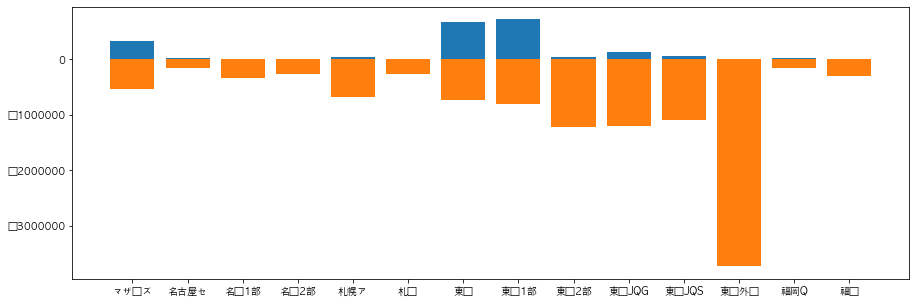

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'AppleGothic'
%matplotlib inline
# coding: utf-8
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.bar(result_marketName.index,result_marketName["trading_volume"])
ax.bar(result_marketName.index,(result_marketName["sellside_atm"]-result_marketName["buyside_atm"]))
plt.show()

In [10]:
result_count

,id,current_price,open_price,yesterday_price,high_price,volume,low_price,trading_volume,over,under,sellside_price,buyside_price,sellside_atm,buyside_atm,銘柄コード,銘柄名,業種分類,単元株数,日経225採用銘柄
市場名,,,,,,,,,,,,,,,,,,,
マザーズ,318,318,318,318,318,318,318,318,318,318,318,318,318,318,318,318,318,318,0
名古屋セ,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,0
名証1部,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0
名証2部,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,0
札幌ア,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0
札証,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0
東証,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,0
東証1部,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143,222
東証2部,453,453,453,453,453,453,453,453,453,453,453,453,453,453,453,453,453,453,0
